# Predictive II Voice Identification Project

<a name="top"></a>
- ### Data Preperation
    + [Standardize](#STD)
    + [PCA](#PCA)
<br>
<br>
- ### Models
    + [Logistic Regression](#LR)
    + [Neural Network](#NNET)
    + [CART](#CART)
    + [KNN](#KNN)
    + [SVM](#SVM)
    + [Boosted Tree](#BT)
    + [Random Forest](#RF)
    + [XGBoost](#XGB)
    + [Naive Bayes](#NB)
<br>
<br>
- ### Evaluation
    + [Results](#RESULTS)

In [4]:
import os
os.getcwd()
path=(r'C:\Users\HAO\Documents\GitHub\VoiceOfPredictives')
os.chdir(path)

In [27]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import neighbors
from sklearn.svm import SVC
from pygam import LogisticGAM
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

import pickle

%matplotlib inline
#%load_ext watermark
#%watermark -a 'VoiceGroup' -d -t -v -p numpy,pandas,xgboost,sklearn,matplotlib,pygam

C:\Users\HAO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



## Data Preparation

<a name="STD"></a>
### Standardize

[Return to top](#top)

In [5]:
def standardize(column):
    return (column - np.mean(column))/np.std(column)

voice = pd.read_csv("voice.csv")
y = voice.label
voice = voice.drop(labels = "label", axis = 1)
voice = voice.apply(standardize)

<a name="PCA"></a>
### PCA

[Return to top](#top)

In [6]:
pca = PCA(n_components=20,random_state=1)
pca.fit(voice) 

PCA(copy=True, iterated_power='auto', n_components=20, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

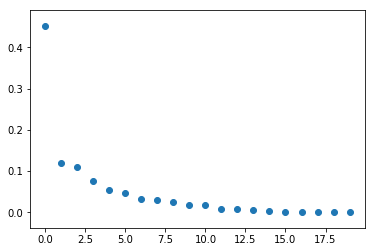

In [8]:
l = pca.explained_variance_ratio_
plt.scatter(y=l,x=range(20))
plt.show()

In [9]:
#Choosing the first six principle components based on the plot above
print("the first six principle components could explain %s variation" % sum(l[:6]))
pca = PCA(n_components=6,random_state=1)
pca.fit(voice)
voice_pc = pd.DataFrame(pca.transform(voice),columns=["PC1","PC2","PC3","PC4","PC5","PC6"])

the first six principle components could explain 0.855256063608 variation



## Models

<a name="LR"></a>
### Logistic Regression
[Return to top](#top)

##### Without PC

In [10]:
lr = LogisticRegression()
lr.fit(voice,y)
kfold = KFold(n_splits=10,random_state=1)
lr_score_pc=np.mean(cross_val_score(lr,X=voice,y=y,cv=kfold))
lr_score_pc

0.95864413209280053

##### With PC

In [11]:
lr = LogisticRegression()
lr.fit(voice_pc,y)
kfold = KFold(n_splits=10,random_state=1)
lr_score_npc=np.mean(cross_val_score(lr,X=voice_pc,y=y,cv=kfold))
lr_score_npc

0.84406620612546424

<a name="NNET"></a>
## Neural Network

[Return to top](#top)

#### Without PC

In [ ]:
# gird search
alphaList = [0.0001,0.001,0.01,0.1,1,10]
numNodesList = [20,30,40,50,60,70,80,90,100]
solverList = ["lbfgs","adam"]
ccr = pd.DataFrame(({"alpha":[],"numNodes":[],"solver":[]"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for alpha in alphaList:
    for numNodes in numNodesList:
        for solver in solverList:
            nn = MLPClassifier(hidden_layer_sizes=numNodes, activation="logistic", alpha=alpha, solver=solver, random_state=1)
            nn.fit(X=voice,y=y)
            scores = cross_val_score(nn, X=voice, y=y, cv=kfold)
            ccr = ccr.append(pd.Series((alpha, numNodes, solver, scores.mean()), index=["alpha", "numNodes","solver","score"]), ignore_index=True)
        print(str(alpha)+" "+str(numNodes)+" finished")

ccr
print(ccr[ccr.score==ccr.score.max()])

Best model param: alpha = 0.0001, hidden_layer_sizes=70, solver="adam"

In [12]:
# best model
kfold = KFold(n_splits=10,random_state=1)
nn = MLPClassifier(hidden_layer_sizes=70,activation="logistic",alpha=0.0001,solver="adam",random_state=1)
nn.fit(X=voice,y=y)
nnet_score_pc=np.mean(cross_val_score(nn, X=voice, y=y, cv=kfold))
nnet_score_pc

0.96021642774427973

#### With PC

In [ ]:
# gird search
alphaList = [0.0001,0.001,0.01,0.1,1,10]
numNodesList = [20,30,40,50,60,70,80,90,100]
solverList = ["lbfgs","adam"]
ccr = pd.DataFrame(({"alpha":[],"numNodes":[],"solver":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for alpha in alphaList:
    for numNodes in numNodesList:
        for solver in solverList:
            nn = MLPClassifier(hidden_layer_sizes=numNodes, activation="logistic", alpha=alpha, solver=solver, random_state=1)
            nn.fit(X=voice_pc,y=y)
            scores = cross_val_score(nn, X=voice_pc, y=y, cv=kfold)
            ccr = ccr.append(pd.Series((alpha, numNodes, solver, scores.mean()), index=["alpha", "numNodes","solver" ,"score"]), ignore_index=True)
        print(str(alpha)+" "+str(numNodes)+" finished")

print(ccr)
print(ccr[ccr.score==ccr.score.max()])

Best model param: alpha=1, hidden_layer_size=30, solver="lbfgs"

In [13]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
nn = MLPClassifier(hidden_layer_sizes=30,activation="logistic",alpha=1,solver="lbfgs",random_state=1)
nn.fit(X=voice_pc,y=y)
nnet_score_npc=np.mean(cross_val_score(nn, X=voice_pc, y=y, cv=kfold))
nnet_score_npc

0.93244219941700268

<a name="CART"></a>
## CART
[Return to top](#top)

#### Without PC

In [ ]:
# grid search
leafSizeList = [1,3,5,10,15,20]
depthList = [3,5,8,10,15]
ccr = pd.DataFrame(({"leafSize":[],"depth":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for leafSize in leafSizeList:
    for depth in depthList:
        ctree = tree.DecisionTreeClassifier(min_samples_leaf=leafSize, max_depth=depth, random_state=1)
        ctree.fit(voice, y)
        scores = cross_val_score(ctree, X=voice, y=y, cv=kfold)
        ccr = ccr.append(pd.Series((leafSize, depth, scores.mean()), index=["leafSize", "depth", "score"]), ignore_index=True)
        print(str(leafSize)+" "+str(depth)+" finished")

ccr
print(ccr[ccr.score==ccr.score.max()])

Best param: depth =3; min_samples_leaf = 5 / 10 / 15 / 20

In [14]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
ctree = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3, random_state=1)
nn.fit(X=voice,y=y)
cart_score_pc=np.mean(cross_val_score(nn, X=voice, y=y, cv=kfold))
cart_score_pc

0.95484366888951

#### With PC

In [ ]:
# grid search
leafSizeList = [1,3,5,10,15,20]
depthList = [3,5,8,10,15]
ccr = pd.DataFrame(({"leafSize":[],"depth":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for leafSize in leafSizeList:
    for depth in depthList:
        ctree = tree.DecisionTreeClassifier(min_samples_leaf=leafSize, max_depth=depth, random_state=1)
        ctree.fit(voice_pc, y)
        scores = cross_val_score(ctree, X=voice_pc, y=y, cv=kfold)
        ccr = ccr.append(pd.Series((leafSize, depth, scores.mean()), index=["leafSize", "depth", "score"]), ignore_index=True)
        print(str(leafSize)+" "+str(depth)+" finished")

ccr
print(ccr[ccr.score==ccr.score.max()])

Best param: depth =10; min_samples_leaf = 1

In [15]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
ctree = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=10, random_state=1)
nn.fit(X=voice_pc,y=y)
cart_score_npc=np.mean(cross_val_score(nn, X=voice_pc, y=y, cv=kfold))
cart_score_npc

0.93244219941700268

<a name="KNN"></a>
## KNN
[Return to top](#top)

#### Without PC

In [ ]:
# Grid search
nnList = [5,10,15,20]
weightsList = ["uniform","distance"]
ccr = pd.DataFrame(({"nn":[],"weights":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for nn in nnList:
    for weights in weightsList:
        knn = neighbors.KNeighborsClassifier(n_neighbors=nn, weights=weights)
        knn.fit(X=voice, y=y)
        scores = cross_val_score(knn, X=voice, y=y, cv=kfold)
        ccr = ccr.append(pd.Series((nn, weights, scores.mean()), index=["nn", "weights", "score"]), ignore_index=True)
        print(str(nn)+" "+str(weights)+" finished")

print(ccr)
print(ccr[ccr.score==ccr.score.max()])

Best param: nn =3; weights="distance"

In [16]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights="distance")
knn.fit(X=voice,y=y)
knn_score_pc=np.mean(cross_val_score(knn, X=voice, y=y, cv=kfold))
knn_score_pc

0.93748253004831683

#### With PC

In [ ]:
# Grid search
nnList = [5,10,15,20]
weightsList = ["uniform","distance"]
ccr = pd.DataFrame(({"nn":[],"weights":[],"score":[]}))

kfold = KFold(n_splits=10,random_state=1)
for nn in nnList:
    for weights in weightsList:
        knn = neighbors.KNeighborsClassifier(n_neighbors=nn, weights=weights)
        knn.fit(X=voice_pc, y=y)
        scores = cross_val_score(knn, X=voice_pc, y=y, cv=kfold)
        ccr = ccr.append(pd.Series((nn, weights, scores.mean()), index=["nn", "weights", "score"]), ignore_index=True)
        print(str(nn)+" "+str(weights)+" finished")

print(ccr)
print(ccr[ccr.score==ccr.score.max()])

Best param: nn =15; weights="distance"

In [17]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights="distance")
knn.fit(X=voice_pc,y=y)
knn_score_npc=np.mean(cross_val_score(knn, X=voice_pc, y=y, cv=kfold))
knn_score_npc

0.90244479495268126

<a name="SVM"></a>
## SVM

[Return to top](#top)

#### Without PC

In [42]:
param_grid = {'kernel': ["linear","poly","rbf","sigmoid"],
             'C': [0.001,0.01,0.1,1,10,100,1000]}
svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
svm= svm.fit(voice, y)
svm.best_params_

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] C=0.001, kernel=linear ..........................................
[CV] . C=0.001, kernel=linear, score=0.8011363636363636, total=   0.1s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] . C=0.001, kernel=linear, score=0.9715909090909091, total=   0.3s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] . C=0.001, kernel=linear, score=0.9526515151515151, total=   0.1s
[CV] C=0.001, kernel=poly ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] ... C=0.001, kernel=poly, score=0.5208333333333334, total=   0.2s
[CV] C=0.001, kernel=poly ............................................
[CV] ... C=0.001, kernel=poly, score=0.5397727272727273, total=   0.2s
[CV] C=0.001, kernel=poly ............................................
[CV] ... C=0.001, kernel=poly, score=0.5293560606060606, total=   0.4s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.6837121212121212, total=   0.4s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.9507575757575758, total=   0.5s
[CV] C=0.001, kernel=rbf .............................................
[CV] .... C=0.001, kernel=rbf, score=0.8314393939393939, total=   0.4s
[CV] C=0.001, kernel=sigmoid .........................................
[CV]  C=0.001, kernel=sigmoid, score=0.7140151515151515, total=   0.3s
[CV] C=0.001, kernel=sigmoid .........................................
[CV]  

[CV] ... C=100, kernel=linear, score=0.9772727272727273, total=   0.8s
[CV] C=100, kernel=linear ............................................
[CV] ... C=100, kernel=linear, score=0.9678030303030303, total=   1.0s
[CV] C=100, kernel=poly ..............................................
[CV] ..... C=100, kernel=poly, score=0.8873106060606061, total=   0.1s
[CV] C=100, kernel=poly ..............................................
[CV] ..... C=100, kernel=poly, score=0.9640151515151515, total=   0.1s
[CV] C=100, kernel=poly ..............................................
[CV] ..... C=100, kernel=poly, score=0.9545454545454546, total=   0.1s
[CV] C=100, kernel=rbf ...............................................
[CV] ...... C=100, kernel=rbf, score=0.9005681818181818, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] ...... C=100, kernel=rbf, score=0.9573863636363636, total=   0.0s
[CV] C=100, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   42.7s finished


{'C': 0.1, 'kernel': 'linear'}

In [18]:
# Best parameter: {'C': 0.1, 'kernel': 'linear'}
svm = SVC(kernel='linear', C=0.1)
svm.fit(voice,y)
kfold = KFold(n_splits=10,random_state=1)
svm_score_pc=np.mean(cross_val_score(svm,X=voice,y=y,cv=kfold))
svm_score_pc

0.96243561074951089

#### With PC

In [19]:
svm = SVC(kernel='linear', C=0.1)
svm.fit(voice_pc,y)
kfold = KFold(n_splits=10,random_state=1)
svm_score_npc=np.mean(cross_val_score(svm,X=voice_pc,y=y,cv=kfold))
svm_score_npc

0.85289701713053545

<a name="BT"></a>
## Boosted Tree
[Return to top](#top)

#### Without PC

In [ ]:
# Grid search
param_grid = {'n_estimators': [10,50,100,150,200,250,300,350,400],
             'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1,2,3,4,5]}
gb_tree_model = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,refit=True,verbose=4)
gb_tree_model = gb_tree_model.fit(voice, y)
gb_tree_model.best_params_

Best param: learning_rate = 0.1; max_depth = 3; n_estimators = 400

In [20]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
gb = GradientBoostingClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3, random_state=0)
gb.fit(X=voice,y=y)
bt_score_pc=np.mean(cross_val_score(gb, X=voice, y=y, cv=kfold))
bt_score_pc

0.96274607674799328

#### With PC

In [ ]:
# Grid search
param_grid = {'n_estimators': [10,50,100,150,200,250,300,350,400],
             'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1,2,3,4,5]}
gb_tree_model = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,refit=True,verbose=4)
gb_tree_model = gb_tree_model.fit(voice_pc, y)
gb_tree_model.best_params_

Best param: learning_rate = 0.1; max_depth = 3; n_estimators = 400

In [21]:
# Best model
kfold = KFold(n_splits=10,random_state=1)
gb = GradientBoostingClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3, random_state=0)
gb.fit(X=voice_pc,y=y)
bt_score_npc=np.mean(cross_val_score(gb, X=voice_pc, y=y, cv=kfold))
bt_score_npc

0.91128259393842581

<a name="RF"></a>
## Random Forest
[Return to top](#top)

#### Without PC

In [ ]:
param_grid = {'max_depth': [5,10,15],
              'min_samples_split' : [10,40],
              'n_estimators':[300],
              'max_features':[5,7,10],
              'criterion': ['gini', 'entropy']}
rf = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=4)
rf= rf.fit(voice, y)
rf.best_params_

Best params:
{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 7,
 'min_samples_split': 40,
 'n_estimators': 300}

In [22]:
kfold = KFold(n_splits=10,random_state=1)
rf = RandomForestClassifier(max_depth = 10,max_features=7,min_samples_split=40, n_estimators = 300, criterion='entropy',random_state=0)
rf.fit(X=voice,y=y)
rf_score_pc=np.mean(cross_val_score(rf, X=voice, y=y, cv=kfold))
rf_score_pc

0.96211416363854152

#### Feature Importance

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


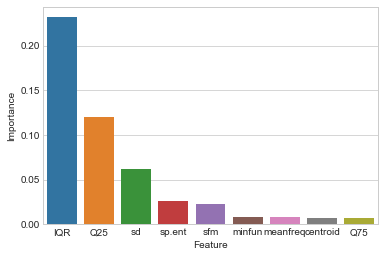

In [189]:
Imp=pd.DataFrame(rf.feature_importances_)
Imp.index=list(voice.columns)
Imp['Feature']=list(voice.columns)
Imp.columns=["Importance","Feature"]
Imp10=Imp.sort_values(by="Importance",ascending=False)[1:10]
sns.barplot(x="Feature", y="Importance", data=Imp10)

In [196]:
list(Imp10.Feature)

['IQR', 'Q25', 'sd', 'sp.ent', 'sfm', 'minfun', 'meanfreq', 'centroid', 'Q75']

#### With PC

In [ ]:
param_grid = {'max_depth': [5,10,15],
              'min_samples_split' : [10,30,40],
              'n_estimators':[300],
              'criterion': ['gini', 'entropy']}
rf2 = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=4)
rf2= rf2.fit(voice_pc, y)
rf2.best_params_

Best params: {'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 300}

In [23]:
kfold = KFold(n_splits=10,random_state=1)
rf2 = RandomForestClassifier(max_depth = 10,min_samples_split=10, n_estimators = 300, criterion='gini',random_state=0)
rf2.fit(X=voice_pc,y=y)
rf_score_npc=np.mean(cross_val_score(rf2, X=voice, y=y, cv=kfold))
rf_score_npc

0.96242862276883745

<a name="XGB"></a>
## XGBoost
[Return to Top](#top)

#### Without PC

In [ ]:
param_grid = {'max_depth':[2,3,5],
              'min_child_weight':[5],
              'gamma':[0],
              'subsample':[0.8],
              'colsample_bytree':[0.8],
              'learning_rate':[0.1],
              'n_estimators':[100],
              'silent':[1],
              'objective':['binary:logistic']}

xgb = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=4)
xgb.fit(voice, y)

In [128]:
print("Best score: %s" % (xgb.best_score_))
print("Best parameter set: %s" % (xgb.best_params_))

Best score: 0.969696969697
Best parameter set: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}


Best parameter set: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}

In [28]:
kfold = KFold(n_splits=10,random_state=1)
xgb = XGBClassifier(colsample_bytree=0.8,
       gamma=0, learning_rate= 0.1,
       max_depth= 3, min_child_weight= 5,
       n_estimators=100,
       objective='binary:logistic',
       silent=1, subsample=0.8)
xgb.fit(X=voice,y=y)
xgb_score_pc=np.mean(cross_val_score(xgb, X=voice, y=y, cv=kfold))
xgb_score_pc

0.96432036896537954

#### With PC

In [ ]:
param_grid = {'max_depth':[2,3,5],
              'min_child_weight':[5],
              'gamma':[0],
              'subsample':[0.8],
              'colsample_bytree':[0.8],
              'learning_rate':[0.1],
              'n_estimators':[100],
              'silent':[1],
              'objective':['binary:logistic']}

xgb = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=4)
xgb.fit(voice_pc, y)

In [233]:
print("Best score: %s" % (xgb.best_score_))
print("Best parameter set: %s" % (xgb.best_params_))

Best score: 0.909090909091
Best parameter set: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}


In [29]:
kfold = KFold(n_splits=10,random_state=1)
xgb = XGBClassifier(colsample_bytree=0.8,
       gamma=0, learning_rate= 0.1,
       max_depth= 3, min_child_weight= 5,
       n_estimators=100,
       objective='binary:logistic',
       silent=1, subsample=0.8)
xgb.fit(X=voice,y=y)
xgb_score_npc=np.mean(cross_val_score(xgb, X=voice_pc, y=y, cv=kfold))
xgb_score_npc

0.89171025835562845

<a name="NB"></a>
## Naive Bayes

[Return to top](#top)

#### Without PC

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(voice,y)
nb_score_pc=np.mean(cross_val_score(knn, X=voice, y=y, cv=kfold))
nb_score_pc

0.92832528051750995

#### With PC

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(voice_pc,y)
nb_score_npc=np.mean(cross_val_score(knn, X=voice_pc, y=y, cv=kfold))
nb_score_npc

0.90244479495268126

<a name="RESULTS"></a>
## Final results comparison
[Return to top](#top)

In [32]:
allscores = [{'Method': 'Logistic Regression', 'no PCA': lr_score_pc, 'PCA': lr_score_npc},
         {'Method': 'Neural Network', 'no PCA': nnet_score_pc, 'PCA': nnet_score_npc},
         {'Method': 'CART', 'no PCA': cart_score_pc, 'PCA': cart_score_npc},
         {'Method': 'KNN', 'no PCA': knn_score_pc, 'PCA': knn_score_npc},
         {'Method': 'Boosted Tree', 'no PCA': bt_score_pc, 'PCA': bt_score_npc},
         {'Method': 'Random Forest', 'no PCA': rf_score_pc, 'PCA': rf_score_npc},
         {'Method': 'XGBoost', 'no PCA': xgb_score_pc, 'PCA': xgb_score_npc},
         {'Method': 'SVM', 'no PCA': svm_score_pc, 'PCA': svm_score_npc},
         {'Method': 'Naive Bayes', 'no PCA': nb_score_pc, 'PCA': nb_score_npc},
         {'Method': 'GAM', 'no PCA':  0.9400253, 'PCA': 0.927399}]
df = pd.DataFrame(allscores)
#{'Method': 'GAM', 'PCA': gam_score_pc, 'No PCA': gam_score_npc}

In [33]:
df.index=df['Method']
df[['no PCA','PCA']].sort_values(by="no PCA",ascending=False)

,no PCA,PCA
Method,,
XGBoost,0.964320,0.891710
Boosted Tree,0.962746,0.911283
SVM,0.962436,0.852897
Random Forest,0.962114,0.962429
Neural Network,0.960216,0.932442
Logistic Regression,0.958644,0.844066
CART,0.954844,0.932442
GAM,0.940025,0.927399
KNN,0.937483,0.902445


Note: we didn't use nls, nlm, loess, ppr. These models are not suitable for classification purpose. They can only handle numeric reponse.